In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib.pyplot as plt

In [7]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle =True,
    image_size = (256,256),
    batch_size =32
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names =dataset.class_names
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [13]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 2 1 1 1 0 1 0 1 1 1 1 0 0]


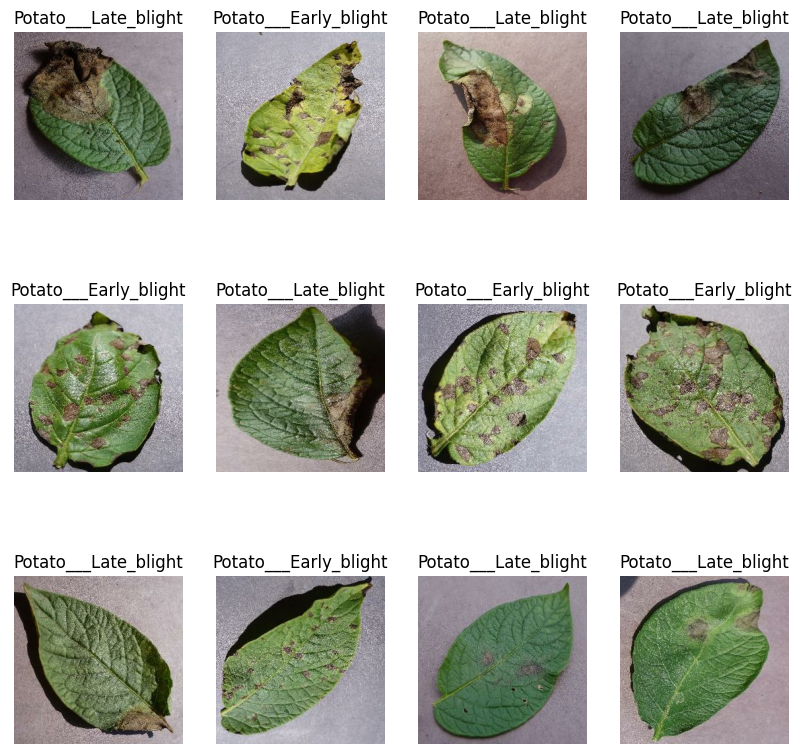

In [33]:
plt.figure(figsize =(10 ,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
    
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    # print(image_batch[0].numpy())

In [41]:
train_set =0.8
train_ds =dataset.take(54)
len(train_ds)

54

In [47]:
test_set =0.1
test_sets=dataset.skip(54)
len(test_sets)

14

In [51]:
val_size =test_sets.take(6)
test_ds =test_sets.skip(6)

In [53]:
len(test_ds)

8

In [71]:
def get_dataset_partition(ds ,train_split =0.8  ,val_split =0.1 ,test_split =0.1 ,shuffle =True ,shuffle_size =10000):
    ds_size =len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds =ds.take(train_size)
    val_ds =ds.skip(train_size).take(val_size)
    test_ds =ds.skip(train_size).skip(val_size)
    return train_ds ,val_ds  ,test_ds

In [73]:
train_ds ,val_ds ,test_ds =get_dataset_partition(dataset)

In [77]:
len(train_ds)

54

In [81]:
len(val_ds)

6

In [83]:
len(test_ds)

8

In [91]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size  =tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size  =tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size  =tf.data.AUTOTUNE)

In [93]:
IMAGE_SIZE =256

In [99]:
resize_and_rescale =tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE ,IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [103]:
data_augmentation  = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [113]:
BATCH_SIZE =32
CHANNELS =3
input_shape =(BATCH_SIZE ,IMAGE_SIZE ,IMAGE_SIZE ,CHANNELS)
n_classes =3
model =models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32 ,kernel_size =(3,3) ,activation ='relu' ,input_shape =input_shape  ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,kernel_size =(3,3) ,activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten() ,
    layers.Dense(64 ,activation ='relu'),
    layers.Dense(n_classes ,activation ='softmax'),
    
])
model.build(input_shape =input_shape)

In [115]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model.compile(
    optimizer ='adam' ,
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics =['accuracy']
)

In [121]:
model.fit(train_ds ,epochs =50 ,batch_size =32 ,verbose =1 ,validation_data =val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 981ms/step - accuracy: 0.4849 - loss: 0.9489 - val_accuracy: 0.4583 - val_loss: 0.9175
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 907ms/step - accuracy: 0.4864 - loss: 0.8799 - val_accuracy: 0.4844 - val_loss: 1.1925
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 841ms/step - accuracy: 0.5702 - loss: 0.8421 - val_accuracy: 0.7448 - val_loss: 0.4816
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 828ms/step - accuracy: 0.8465 - loss: 0.4039 - val_accuracy: 0.9010 - val_loss: 0.2309
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 836ms/step - accuracy: 0.8832 - loss: 0.3061 - val_accuracy: 0.8698 - val_loss: 0.3042
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 830ms/step - accuracy: 0.8671 - loss: 0.3465 - val_accuracy: 0.9167 - val_loss: 0.1794
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 836ms/step - accuracy: 0.9013 - loss: 0.2370 - val_accuracy: 0.9427 - val_loss: 0.1655
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 849ms/step - accuracy: 0.9198 - loss: 0.2028 - val_accu

In [123]:
model.fit(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9927 - loss: 0.0339
